<a href="https://colab.research.google.com/github/AritriPodde2210/CustomerChurnPredictionWithDeployment/blob/main/Another_copy_of_CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction**

**Data Generation**

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 5000

data = pd.DataFrame({
    'CustomerID': np.arange(1, n_samples + 1),
    'Age': np.random.randint(18, 90, size=n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n_samples),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n_samples), 2),
    'TotalCharges': lambda x: (x['MonthlyCharges'] * np.random.uniform(1, 48)).round(2),
    'TechSupport': np.random.choice(['Yes', 'No'], size=n_samples, p=[0.3, 0.7]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_samples),
    'Tenure': np.random.randint(1, 72, size=n_samples),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], size=n_samples),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n_samples),
    'Churn': np.random.choice(['Yes', 'No'], size=n_samples, p=[0.2, 0.8]) # Approx. 20% churn rate
})

# Calculate TotalCharges after generating MonthlyCharges and Tenure
data['TotalCharges'] = (data['MonthlyCharges'] * data['Tenure']).round(2)

# Create derived features
data['average_monthly_charges'] = (data['TotalCharges'] / data['Tenure']).fillna(0).round(2)
data['customer_lifetime_value'] = (data['Tenure'] * data['MonthlyCharges']).round(2)

# Introduce data quality issues (missing values, outliers)
data.loc[data.sample(frac=0.05).index, 'MonthlyCharges'] = np.nan  # Introduce missing values
data.loc[data.sample(frac=0.05).index, 'Age'] = data['Age'] + np.random.randint(5, 20)  # Outliers in age

# Check the generated data
print(data.head())
data.to_csv('telecom_Customer_churn_data.csv', index=False)

   CustomerID  Age  Gender    ContractType  MonthlyCharges  TotalCharges  \
0           1   69    Male        Two year          112.62       7095.06   
1           2   32  Female        Two year           28.84        749.84   
2           3   89    Male        One year          115.44       1500.72   
3           4   78    Male  Month-to-month          112.13       2578.99   
4           5   38    Male  Month-to-month           25.40        889.00   

  TechSupport InternetService  Tenure PaperlessBilling     PaymentMethod  \
0          No              No      63               No      Mailed check   
1          No     Fiber optic      26              Yes       Credit card   
2         Yes     Fiber optic      13               No     Bank transfer   
3         Yes              No      23               No      Mailed check   
4          No             DSL      35               No  Electronic check   

  Churn  average_monthly_charges  customer_lifetime_value  
0    No                   

        CustomerID          Age  MonthlyCharges  TotalCharges       Tenure  \
count  5000.000000  5000.000000     4750.000000   5000.000000  5000.000000   
mean   2500.500000    53.949000       69.910373   2510.626776    35.912200   
std    1443.520003    20.828307       28.750025   1837.517666    20.339539   
min       1.000000    18.000000       20.010000     23.230000     1.000000   
25%    1250.750000    36.000000       45.370000   1015.615000    18.000000   
50%    2500.500000    54.000000       69.825000   2076.080000    36.000000   
75%    3750.250000    72.000000       94.405000   3706.675000    53.000000   
max    5000.000000   102.000000      119.990000   8304.100000    71.000000   

       average_monthly_charges  customer_lifetime_value  
count              5000.000000              5000.000000  
mean                 70.044762              2510.626776  
std                  28.784772              1837.517666  
min                  20.010000                23.230000  
25%    

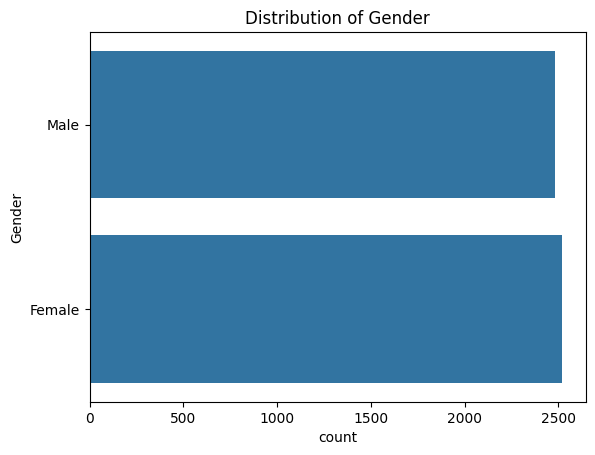

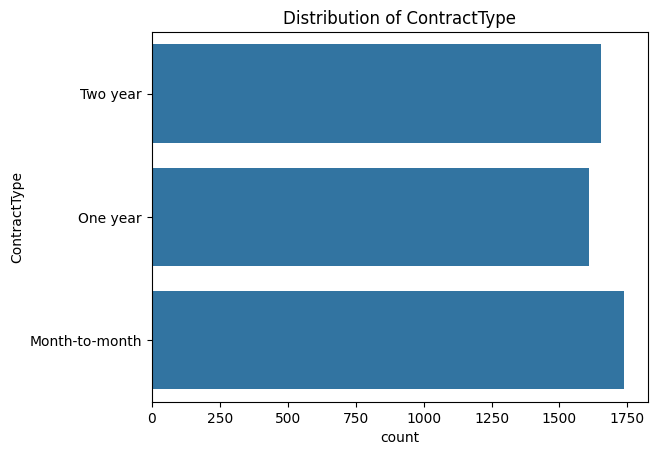

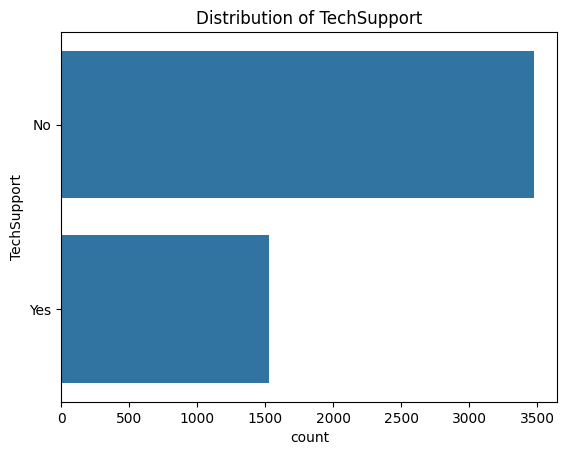

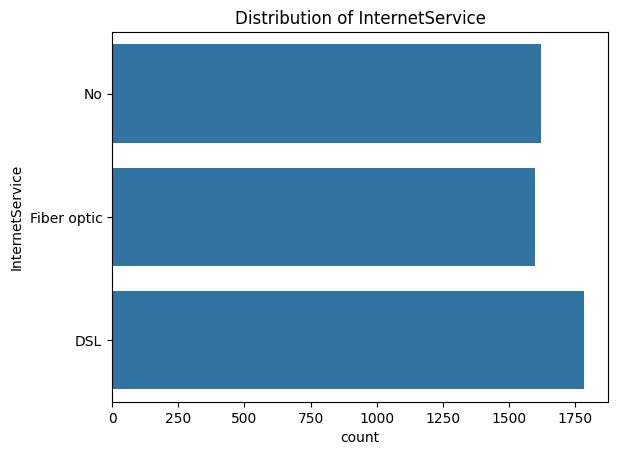

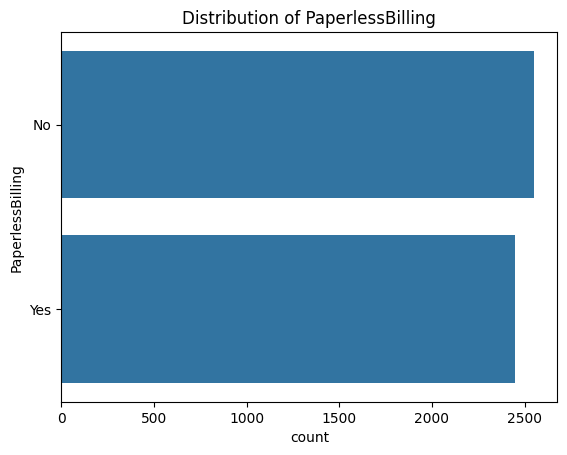

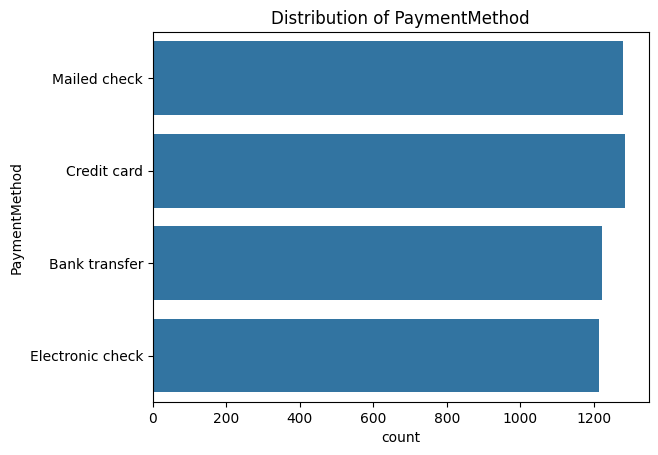

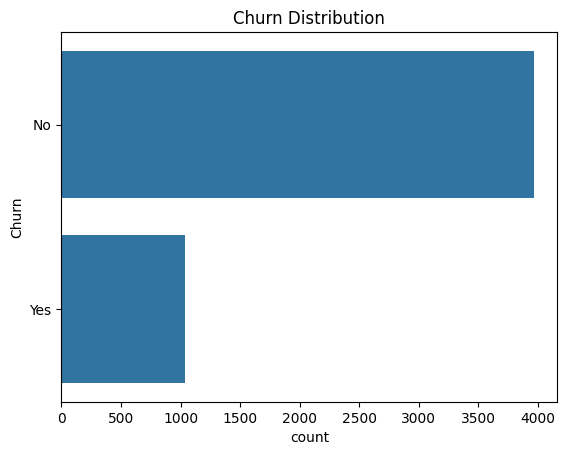

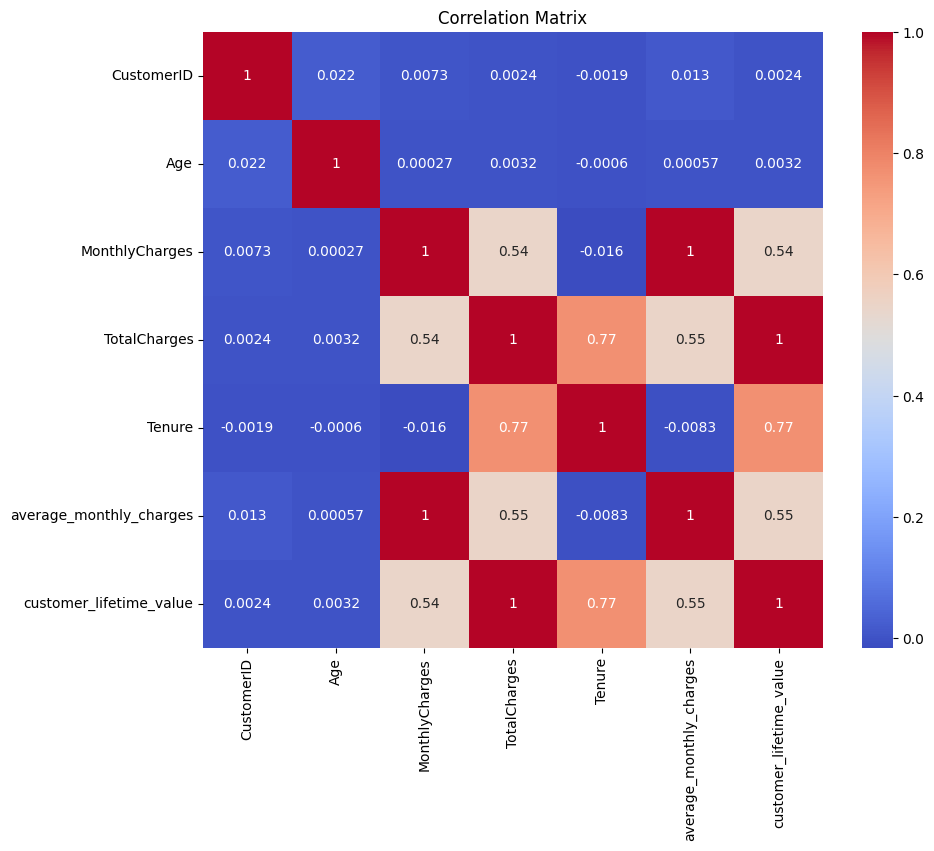

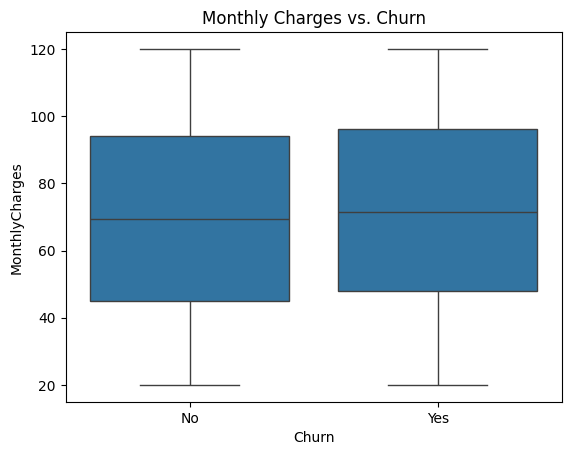

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_data = data.select_dtypes(include=['number'])
print(numerical_data.describe())


for col in ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod']:
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize relationships between features and target
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs. Churn')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle missing values for numerical columns only
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    data[col] = le.fit_transform(data[col])

# Split the data
X = data.drop(columns=['Churn', 'CustomerID'])
y = data['Churn']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(len(X_train))

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
import joblib

X.head()

3000


,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,average_monthly_charges,customer_lifetime_value
0,69,1,2,112.62,7095.06,0,2,63,0,3,112.62,7095.06
1,32,0,2,28.84,749.84,0,1,26,1,1,28.84,749.84
2,89,1,1,115.44,1500.72,1,1,13,0,0,115.44,1500.72
3,78,1,0,112.13,2578.99,1,2,23,0,3,112.13,2578.99
4,38,1,0,25.40,889.00,0,0,35,0,2,25.40,889.00


In [ ]:
data.shape

(5000, 14)

In [ ]:
data_columns = data.columns.tolist()
for column in data_columns:
    print(f"{column} unique values : {data[column].unique()}")

CustomerID unique values : [   1    2    3 ... 4998 4999 5000]
Age unique values : [ 69  32  89  78  38  41  20  39  70  19  47  55  81  90  50  88  66  76
  59  77  79  64  92  68  72  24  56  35  21  31  26  61  25  52  53  67
  23  71  84  80  51  65  57  43  58  46  62  82  18  28  22  45  29  40
  54  44  60  30  49  83  74  87  75  73  36  85  34  86  33  37  48  42
  63  91  27 100  97  98  93 101  94  96 102  99  95]
Gender unique values : [1 0]
ContractType unique values : [2 1 0]
MonthlyCharges unique values : [112.62  28.84 115.44 ... 116.69  56.27  69.9 ]
TotalCharges unique values : [7095.06  749.84 1500.72 ... 1258.2  4011.92 2180.43]
TechSupport unique values : [0 1]
InternetService unique values : [2 1 0]
Tenure unique values : [63 26 13 23 35 12  9 67 44 61 21  7 11 45 32 36 37 41 49 15 53 33 48 68
 57 62  2 16  8 19 25 31 30 43 47  3 66 28 38  4 46 69 51 60 18 20 22  1
 54 58 70 17  5 64 14 39 55 42 52 59 56 10 71 27 40 50 29  6 65 34 24]
PaperlessBilling unique value

we can take some conclusions from this
Customers have a wide range of ages,tenures and total charges so it needs to analysis data strategically.

**Feature Engineering**

In [ ]:
X['TotalMonthlyCharges'] = X['MonthlyCharges'] * X['Tenure']
X['ChargesPerYear'] = X['TotalCharges'] / (X['Tenure'] / 12)
X['ChargesPerYear'].fillna(0, inplace=True)

**Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

# Evaluate on validation set
y_pred = grid_search.predict(X_val)
print(classification_report(y_val, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_val, y_pred)}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best ROC AUC score: 0.4943991836600339
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       1.00      0.01      0.01       180

    accuracy                           0.82      1000
   macro avg       0.91      0.50      0.46      1000
weighted avg       0.85      0.82      0.74      1000

ROC AUC score: 0.5027777777777778


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   int64  
 3   ContractType             5000 non-null   int64  
 4   MonthlyCharges           5000 non-null   float64
 5   TotalCharges             5000 non-null   float64
 6   TechSupport              5000 non-null   int64  
 7   InternetService          5000 non-null   int64  
 8   Tenure                   5000 non-null   int64  
 9   PaperlessBilling         5000 non-null   int64  
 10  PaymentMethod            5000 non-null   int64  
 11  Churn                    5000 non-null   int64  
 12  average_monthly_charges  5000 non-null   float64
 13  customer_lifetime_value  5000 non-null   float64
dtypes: float64(4), int64(10)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on validation set
y_pred = grid_search.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.821
Precision: 1.0
Recall: 0.005555555555555556
F1-score: 0.011049723756906079


**Model selection and Evaluation**

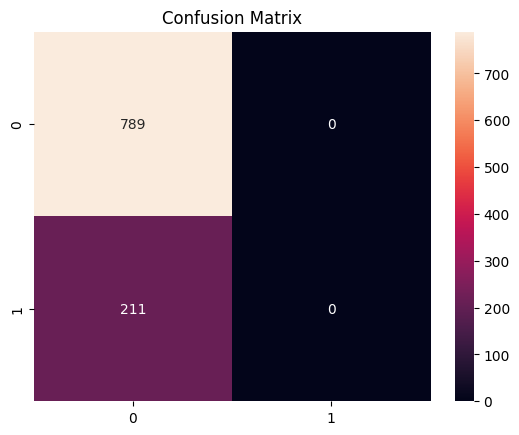

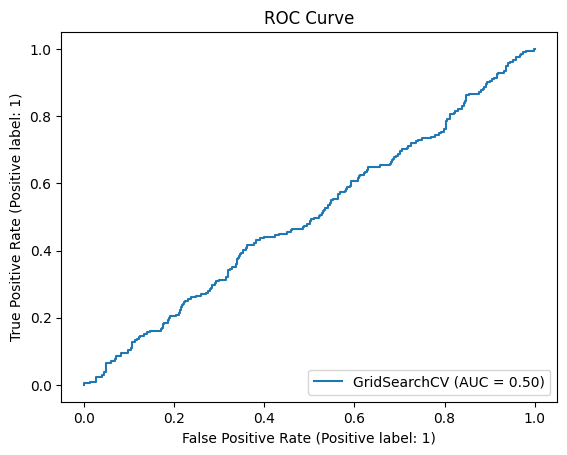

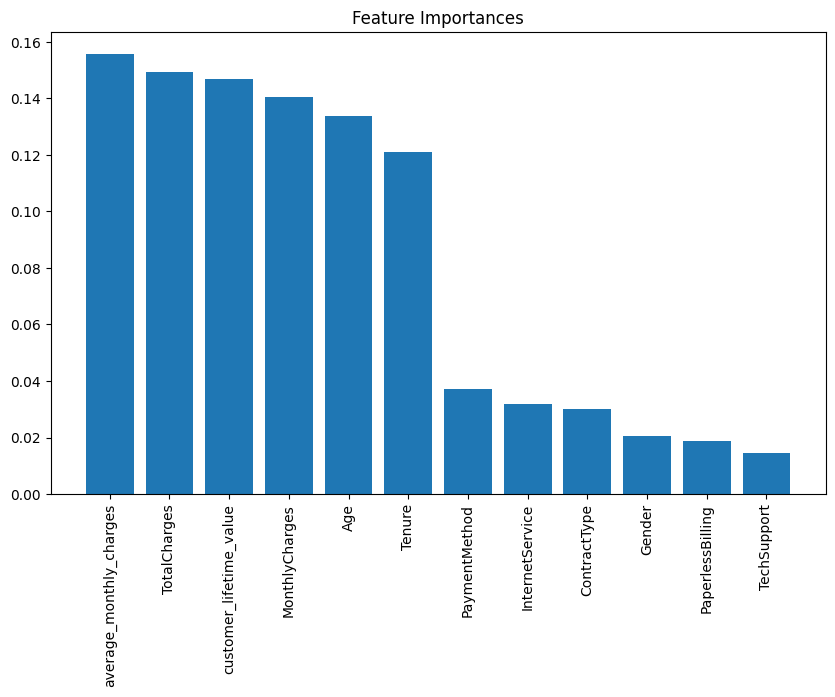

In [ ]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# Confusion matrix
conf_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(grid_search, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature Importance for Random Forest
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

**Missing Values**


There is no missing values for my dataset

**Saving the Model**

In [ ]:
import joblib

joblib.dump(grid_search.best_estimator_, 'churn_model.pkl')

# To load the model later
# model = joblib.load('churn_model.pkl')


['churn_model.pkl']

In [ ]:
print(X.columns)

Index(['Age', 'Gender', 'ContractType', 'MonthlyCharges', 'TotalCharges',
       'TechSupport', 'InternetService', 'Tenure', 'PaperlessBilling',
       'PaymentMethod', 'average_monthly_charges', 'customer_lifetime_value',
       'TotalMonthlyCharges', 'ChargesPerYear'],
      dtype='object')


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.3 MB/s eta 0:00:00


 97%|=================== | 1944/2000 [00:29<00:00]       

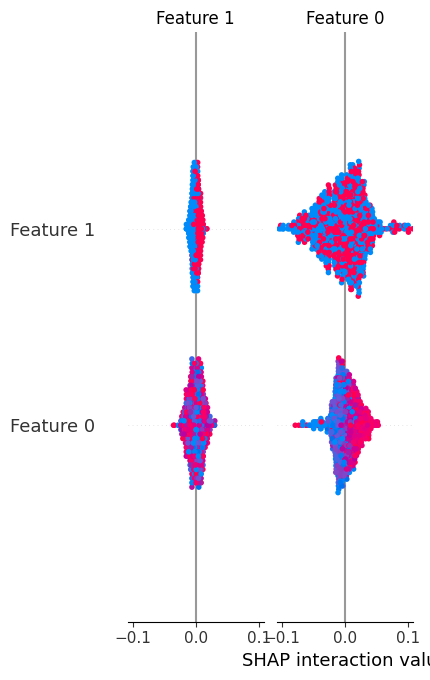

In [ ]:
import shap
import joblib
import numpy as np
import pandas as pd

# Load the trained model
model = joblib.load('churn_model.pkl')

# Prepare a subset of the validation data for faster computation
# If X_val is a NumPy array, use np.random.choice for random sampling
np.random.seed(42)  # For reproducibility
indices = np.random.choice(X_val.shape[0], size=1000, replace=False)
X_val_subset = X_val[indices]

# If y_val is a pandas Series or DataFrame, align it with the subset indices
y_val_subset = y_val.iloc[indices]

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_val_subset, check_additivity=False)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_val_subset)


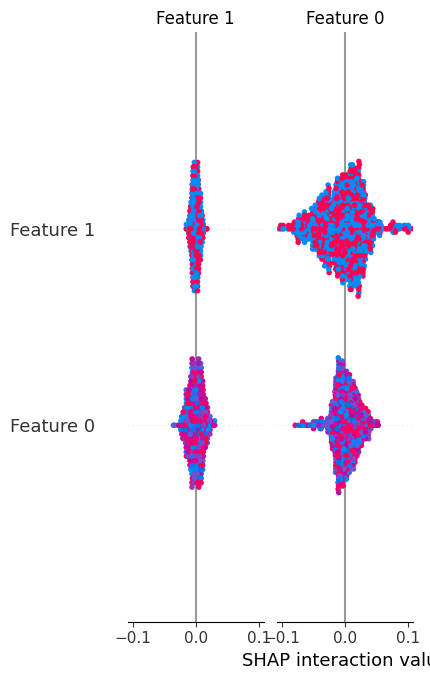

In [ ]:
shap.summary_plot(shap_values, X_val, plot_type="dot")

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming you have these categorical features in your dataset
categorical_features = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

# Initialize label encoders and fit them on training data
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Save each label encoder using joblib
joblib.dump(label_encoders, 'label_encoders.pkl')

# Initialize and fit the scaler on numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure', 'average_monthly_charges', 'customer_lifetime_value']
scaler.fit(data[numerical_features])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Example: Save the trained model after fitting
model.fit(X_train, y_train)
joblib.dump(model, 'churn_model.pkl')


['churn_model.pkl']

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import json

# Load the trained model and the fitted scaler
scaler = joblib.load('/content/scaler.pkl')
model = joblib.load('/content/churn_model.pkl')
print("Expected features:", scaler.feature_names_in_)

def predict_churn(input_data):
  try:
    print(input_data)
    input_data = json.loads(input_data)
    # Convert input data to a DataFrame for processing
    df = pd.DataFrame([input_data])

    # Encode categorical variables using the same method as in training
    for col in ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Ensure we use only the features the model was trained on
    df = df[scaler.feature_names_in_]

    # Scale features using the pre-fitted scaler
    df_scaled = scaler.transform(df)

    # Make prediction
    prediction = model.predict(df_scaled)

    return 'Churn' if prediction[0] == 1 else 'No Churn'

    # Handle any potential errors
  except Exception as e:
    return f"Error: {str(e)}"

# Example usage
input_example = {
    'Age': 35,
    'Gender': 'Male',
    'ContractType': 'Month-to-month',
    'TechSupport': 'No',
    'InternetService': 'DSL',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 3,
    'MonthlyCharges': 70.35,
    'Tenure': 24,
    'TotalCharges': 1688.95,
    'average_monthly_charges': 5.99,
    'customer_lifetime_value': 1688.95
}

print(predict_churn(input_example))




Expected features: ['Age' 'MonthlyCharges' 'TotalCharges' 'Tenure' 'average_monthly_charges'
 'customer_lifetime_value']
{'Age': 35, 'Gender': 'Male', 'ContractType': 'Month-to-month', 'TechSupport': 'No', 'InternetService': 'DSL', 'PaperlessBilling': 'Yes', 'PaymentMethod': 3, 'MonthlyCharges': 70.35, 'Tenure': 24, 'TotalCharges': 1688.95, 'average_monthly_charges': 5.99, 'customer_lifetime_value': 1688.95}
Error: the JSON object must be str, bytes or bytearray, not dict


In [ ]:
!pip freeze | grep scikit-learn


scikit-learn==1.3.2


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
# import pickle
# from sklearn.ensemble import RandomForestClassifier

# # Example code to create and save a model
# model = RandomForestClassifier()
# # Assume `X_train` and `y_train` are your training data and labels
# model.fit(X_train, y_train)

# # Save the model
# with open('churn_model.pkl', 'wb') as file:
#     pickle.dump(model, file)


In [ ]:
import gradio as gr

# Define the function that processes the input data
def predict_churn(input_data):
    # Here you can directly use the input_data as a dictionary
    # For example, accessing 'Age' as input_data['Age']
    return f"Received input: {input_data}"

# Define the individual input components
age = gr.Textbox(label='Enter Age')
gender = gr.Radio(['Male', 'Female'], label='Select Gender')
contract_type = gr.Radio(['Month-to-month', 'One year', 'Two year'], label='Select Contract Type')
tech_support = gr.Radio(['Yes', 'No'], label='Tech Support')
internet_service = gr.Radio(['DSL', 'Fiber optic', 'No'], label='Internet Service')
paperless_billing = gr.Radio(['Yes', 'No'], label='Paperless Billing')
payment_method = gr.Radio(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], label='Payment Method')
monthly_charges = gr.Textbox(label='Monthly Charges')
tenure = gr.Textbox(label='Tenure')
total_charges = gr.Textbox(label='Total Charges')
average_monthly_charges = gr.Textbox(label='Average Monthly Charges')
customer_lifetime_value = gr.Textbox(label='Customer Lifetime Value')

# Function to combine inputs into a dictionary
def combine_inputs(age, gender, contract_type, tech_support, internet_service, paperless_billing, payment_method, monthly_charges, tenure, total_charges, average_monthly_charges, customer_lifetime_value):
    input_data = {
        "Age": age,
        "Gender": gender,
        "ContractType": contract_type,
        "TechSupport": tech_support,
        "InternetService": internet_service,
        "PaperlessBilling": paperless_billing,
        "PaymentMethod": ['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'].index(payment_method),
        "MonthlyCharges": monthly_charges,
        "Tenure": tenure,
        "TotalCharges": total_charges,
        "average_monthly_charges": average_monthly_charges,
        "customer_lifetime_value": customer_lifetime_value
    }
    return input_data

# Define the inputs list
input_components = [
    age,
    gender,
    contract_type,
    tech_support,
    internet_service,
    paperless_billing,
    payment_method,
    monthly_charges,
    tenure,
    total_charges,
    average_monthly_charges,
    customer_lifetime_value
]

# Create the Gradio interface
application = gr.Interface(
    fn=lambda *args: predict_churn(combine_inputs(*args)),  # Combine inputs into a dictionary and pass to predict_churn
    inputs=input_components,
    outputs=gr.Textbox(label="Output"),
    title="Churn Prediction"
)

# Launch the application
application.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://87242e83c8e7dc9157.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
X = {
    'Age': 35,
    'Gender': 'Male',
    'ContractType': 'Month-to-month',
    'TechSupport': 'No',
    'InternetService': 'DSL',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 3,
    'MonthlyCharges': 70.35,
    'Tenure': 24,
    'TotalCharges': 1688.95,
    'average_monthly_charges': 5.99,
    'customer_lifetime_value': 1688.95
}
print(predict_churn(X))

Received input: {'Age': 35, 'Gender': 'Male', 'ContractType': 'Month-to-month', 'TechSupport': 'No', 'InternetService': 'DSL', 'PaperlessBilling': 'Yes', 'PaymentMethod': 3, 'MonthlyCharges': 70.35, 'Tenure': 24, 'TotalCharges': 1688.95, 'average_monthly_charges': 5.99, 'customer_lifetime_value': 1688.95}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
